In [1]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
# Convert all numbers to float first
df = df.astype(float)
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

In [2]:
import numpy as np
import pandas as pd


# Reemplazamos valores 0 por NaN en las columnas donde 0 no aplica
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

# Si prefieres rellenar los NaN antes de convertir a enteros, puedes usar .fillna()
# Aquí, por ejemplo, rellenamos NaN con 0 antes de la conversión a int
df[cols] = df[cols].fillna(0).astype(float)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627  50.0      1.0  
1                

In [3]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [4]:
# Imputamos con la media
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

/tmp/ipykernel_2062/1805061363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
/tmp/ipykernel_2062/1805061363.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [5]:
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)

/tmp/ipykernel_2062/1203048124.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
/tmp/ipykernel_2062/1203048124.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [22]:
# Revisamos si hay valores faltantes después de la imputación
print(df.isnull().sum())
print("=====")
print(df.info())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


NameError: name 'prtin' is not defined

In [7]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Verificamos la distribución de las clases
class_distribution = df['Outcome'].value_counts()
print(class_distribution)

Outcome
0.0    500
1.0    268
Name: count, dtype: int64


/tmp/ipykernel_2062/2187748390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set2')


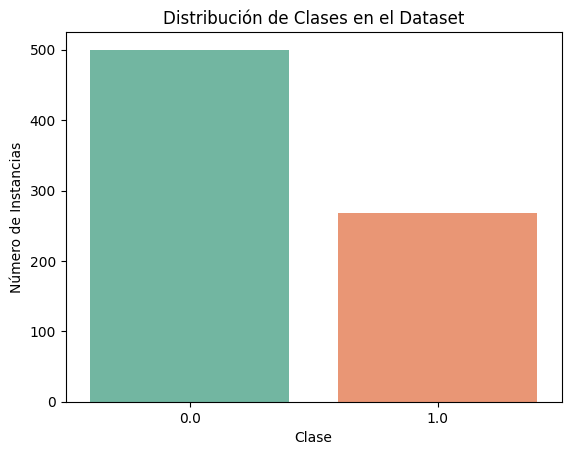

In [10]:
# Usamos Seaborn para visualizar la distribución
sns.countplot(x='Outcome', data=df, palette='Set2')

# Añadimos títulos y etiquetas
plt.title('Distribución de Clases en el Dataset')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.show()

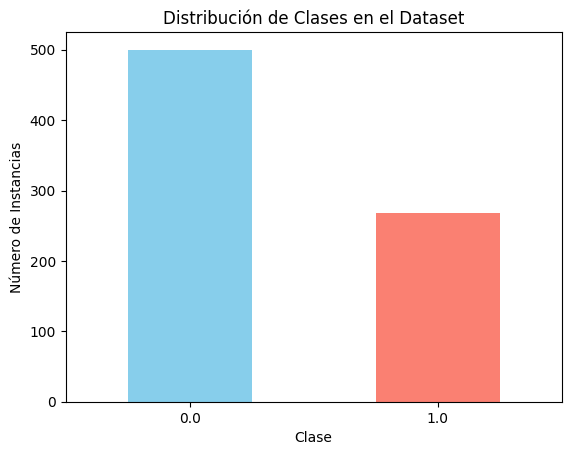

In [11]:
# Usamos Matplotlib para hacer un gráfico de barras
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])

# Añadimos títulos y etiquetas
plt.title('Distribución de Clases en el Dataset')
plt.xlabel('Clase')
plt.ylabel('Número de Instancias')
plt.xticks(rotation=0)
plt.show()

SEPARAR CONJUNTO DE DATOS

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
# Separamos características y la variable objetivo
X = df.drop('Outcome', axis=1)  # Features (sin la columna 'Outcome')
y = df['Outcome']  # Target (la columna 'Outcome')

In [14]:
# Dividimos en 70% para entrenamiento y 30% para validación + test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [15]:
# Dividimos en 15% validación y 15% testeo
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [16]:
print(f"Conjunto de entrenamiento: {len(X_train)} muestras")
print(f"Conjunto de validación: {len(X_val)} muestras")
print(f"Conjunto de prueba: {len(X_test)} muestras")

Conjunto de entrenamiento: 537 muestras
Conjunto de validación: 115 muestras
Conjunto de prueba: 116 muestras


SET DE DATOS DE VALIDACIÓN

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Creamos el modelo
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para clasificación binaria

# Compilamos el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamos el modelo y validamos en el conjunto de validación
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_val_scaled, y_val))

# Guardamos el modelo en un archivo .h5
model.save('diabetes_model.h5')

2024-10-16 21:30:30.507669: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 21:30:30.513501: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-16 21:30:30.520952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 21:30:30.533748: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 21:30:30.538360: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 21:30:30.551929: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/30


/home/mrch1ck3n/MySecondBrain/1.Projects/Universidad/ProyectoFinal/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729135832.394041    2062 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 21:30:32.396475: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download a

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6728 - loss: 0.6318 - val_accuracy: 0.7913 - val_loss: 0.5386
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7653 - loss: 0.5581 - val_accuracy: 0.8174 - val_loss: 0.4951
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7677 - loss: 0.5076 - val_accuracy: 0.8087 - val_loss: 0.4692
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4946 - val_accuracy: 0.7826 - val_loss: 0.4605
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4436 - val_accuracy: 0.7826 - val_loss: 0.4618
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7869 - loss: 0.4505 - val_accuracy: 0.7304 - val_loss: 0.4677
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7894 - loss: 0.4671 - val_accuracy: 0.7391 - val_loss: 0.4669
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7984 - loss: 0.4272 - val_accuracy: 0.7391 - val_loss: 0.4758
Epo

Se probaron 50, 150,200 epocs, pero el rendimiento bajaba por encima de los 30, por lo que se decidió dejar en esa cantidad

Early Stopping (experimentos en gráficos de convergencia indicaban perdida significativa de validación)

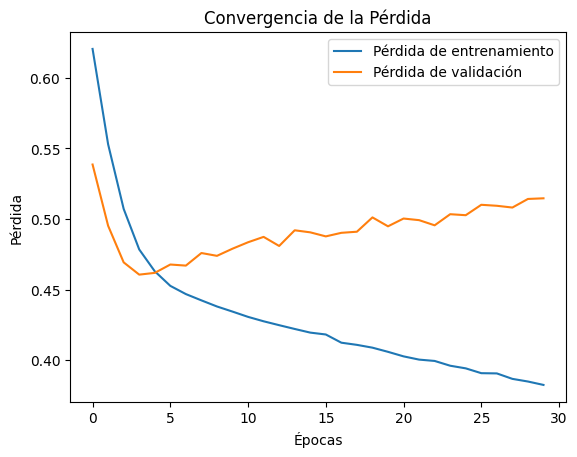

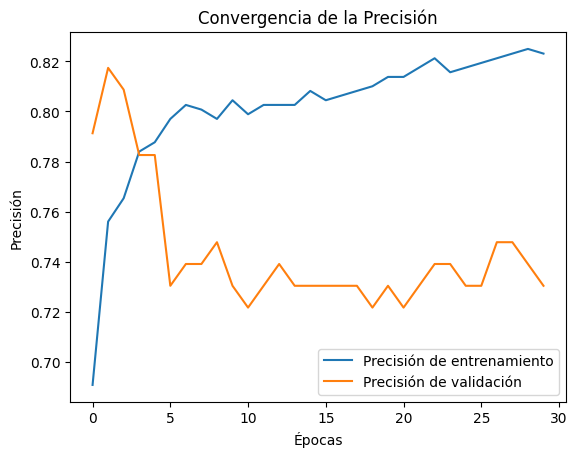

In [18]:
import matplotlib.pyplot as plt

# Graficamos la pérdida en el entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Convergencia de la Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficamos la precisión en el entrenamiento y validación
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Convergencia de la Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

In [19]:
# Escalamos los datos de prueba
X_test_scaled = scaler.transform(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        75
         1.0       0.71      0.49      0.58        41

    accuracy                           0.75       116
   macro avg       0.74      0.69      0.70       116
weighted avg       0.74      0.75      0.74       116



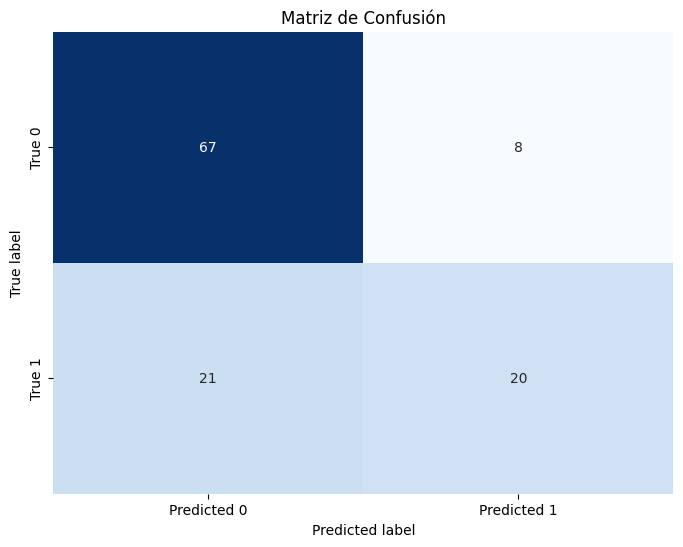

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Normalizamos el conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Hacemos predicciones sobre el conjunto de prueba
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluamos el modelo utilizando accuracy, precision, recall y f1-score
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Creamos la Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Matriz de Confusión')
plt.show()